Machine Learning is an iterative process.<br>
We will face choices about what predictive variables to use, what types of models to use, what arguements to supply to those models, etc. So far we have made these choices in a data driven way by measuring the model quality with a validation set.<br>
But there are some drawbacks, imagine you have a dataset with 5000 rows. Lets keep 20% of the data as a validation dataset or 1000 rows. But this leaves some random chance in determining model scores. That is, a model might do well on one set of 1000 rows, even if it would be inaccurate on a different 1000 rows.<br>
In general the larger the validation set, the less randomeness aka noise there is in our measure of model quality and more reliable it will be.<br>
Unfortunately we can only get a large validation set of removing rows from our training data, and smaller training datasets mean worse models.<br><br>

## What is Cross validation?
In cross-validation, wee run our modeling process on different subsets of the data to get multiple measures of model quality.<br>
Like we could divide the data into 5 pieces, each 20% of the full dataset. In this case we have broken the data into 5 folds.<br>
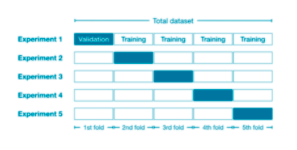
Then we run 1 experiment for each fold: <br>
In experiment 1 we use the first fold as validation (or holdout) set and everything else as training data. This gives us a measure of model quality based on a 20% holdout set.<br>
In Experiment 2, we hold out the data from the second fold and use everything except the second fold for training the model. The holdout set is then used to get a second estimate of model quality.<br>
We repeat this process useing every fold once as the holdout set. Putting this together, 100% of the data is used as holdout as some point, and we end up with a measure of model quality that is based on all of the rows in the dataset, even if we don't use all rows simultaneously.
<br>
## When should we use cross-validation?
Cross-validation gives a more accurate measure of model quality, which is espicially important if we are making a lot of modelling decisions. However it can take longer to run, because it estimates multiple models (one for each fold).<br>
Use it:<br>
1) For small datasets, where extra computational burder isn't a big deal.<br>
2) For larger datasets, a single validation set is sufficient. Your code will run faster and you may have enough data that there's little need for cross validation.<br>


In [1]:
import pandas as pd

data = pd.read_csv("Datasets/melb_data.csv")

cols_to_use = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
X = data[cols_to_use]
y = data.Price

We will define a pipeline that uses an imputer to fill in the missing values and a random forest model to make predictions.<br>
While it is possible to do cross-validation without pipelines, it is difficult. Using a pipeline will make the code remarkably straightforward.

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps = [
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators = 50, random_state = 0))
])


We obtain the cross-validation scores with the cross_val_score() function from scikit-learn. We set the number of folds with the cv parameter.

In [3]:
from sklearn.model_selection import cross_val_score

#Multiply by -1 since sklearn calculates negative MAE
scores = -1 * cross_val_score(my_pipeline, X, y, cv = 5, scoring = 'neg_mean_absolute_error')
print('MAE scores:\n', scores)

MAE scores:
 [301628.7893587  303164.4782723  287298.331666   236061.84754543
 260383.45111427]


The scoring paramater chooses a measure of model quality to report. In this casee we chose negative mean absolute error. It is a little suprising that we specify negative MAE. Scikit learn has a convention where all metrics are defined so a high number is better. Using negative here allows them to be consistent with that convention, though negative MAE is almost unheard of.<br>
We typically want a single measure of model quality to compare alternative so we take average across experiments.

In [4]:
print('Average MAE Score across experiments:')
print(scores.mean())

Average MAE Score across experiments:
277707.3795913405
